# Mechanical Buckling vs Turing Patterns
This notebook runs side-by-side simulations of the 1D buckling model and 2D Turing reaction–diffusion model, then compares their outputs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model
import utils

In [2]:
# Domain for buckling (1D)
x = np.linspace(0, 1, 200)
E = 1.0
nu = 0.3
t_c = np.ones_like(x) * 0.1
P = 10.0
q = 1.0

# Domain for Turing (2D)
N = 200
domain = np.linspace(0, 1, N)
dx = domain[1] - domain[0]
u0 = np.random.rand(N, N) * 0.1 + 0.5
v0 = np.random.rand(N, N) * 0.1
Du, Dv = 0.16, 0.08

def f(u, v):
    return u - u**3 - v

def g(u, v):
    return u - v

steps = 500

# Run simulations
w = model.sim_buckling(E, nu, t_c, P, q, x)
u, v = model.sim_turing(Du, Dv, f, g, u0, v0, dx, dt=1e-2, steps=steps)

# Compare patterns (projecting w into 2D slice for correlation)
w2d = np.tile(w, (N,1))
metrics = model.compare_patterns(w2d, u)

print("Similarity metrics:", metrics)

Similarity metrics: {'correlation': np.float64(0.09403488180953841)}


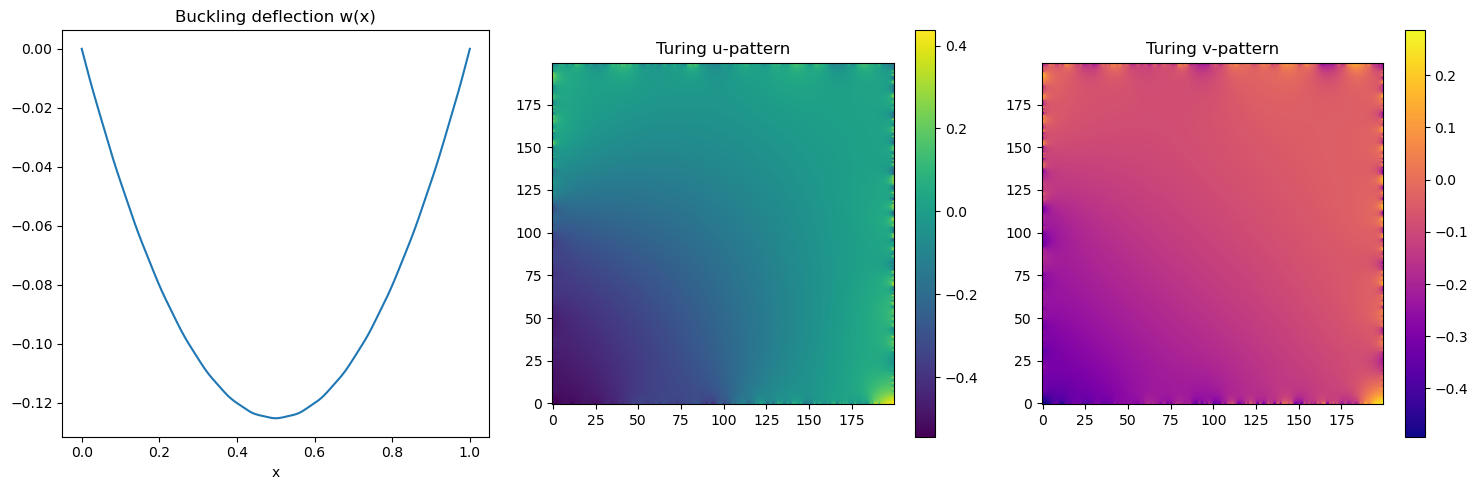

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Buckling result (1D)
axs[0].plot(x, w)
axs[0].set_title('Buckling deflection w(x)')
axs[0].set_xlabel('x')

# Turing u pattern
c1 = axs[1].imshow(u, cmap='viridis', origin='lower')
axs[1].set_title('Turing u-pattern')
fig.colorbar(c1, ax=axs[1])

# Turing v pattern
c2 = axs[2].imshow(v, cmap='plasma', origin='lower')
axs[2].set_title('Turing v-pattern')
fig.colorbar(c2, ax=axs[2])

plt.tight_layout()
plt.show()